In [1]:
import pandas as pd 

In [2]:
# Membuka file CSV
csv = pd.read_csv("1_raw_data_13-12_22.03.16.csv")

# Masukan data CSV ke dalam DataFrame
df = pd.DataFrame(csv)

In [3]:
# Deskripsikan dataframe 
df.describe()

,time,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class
count,63196.000000,63196.000000,63196.000000,63196.000000,63196.000000,63196.000000,63196.00000,63196.000000,63196.000000,63196.000000
mean,32777.490094,-0.000008,-0.000009,-0.000009,-0.000010,-0.000012,-0.00001,-0.000008,-0.000008,1.212086
std,18943.835626,0.000144,0.000134,0.000124,0.000155,0.000198,0.00016,0.000133,0.000142,1.947578
min,1.000000,-0.001110,-0.001020,-0.000910,-0.001040,-0.001280,-0.00112,-0.001090,-0.000980,0.000000
25%,16340.750000,-0.000030,-0.000040,-0.000050,-0.000040,-0.000040,-0.00004,-0.000030,-0.000030,0.000000
50%,32781.500000,-0.000010,-0.000010,-0.000010,-0.000010,-0.000010,-0.00001,-0.000010,-0.000010,0.000000
75%,49199.250000,0.000010,0.000020,0.000030,0.000020,0.000010,0.00001,0.000010,0.000010,2.000000
max,65661.000000,0.001270,0.001270,0.001270,0.001270,0.001270,0.00127,0.001270,0.001270,6.000000


In [4]:
# Rangkuman dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63196 entries, 0 to 63195
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      63196 non-null  int64  
 1   channel1  63196 non-null  float64
 2   channel2  63196 non-null  float64
 3   channel3  63196 non-null  float64
 4   channel4  63196 non-null  float64
 5   channel5  63196 non-null  float64
 6   channel6  63196 non-null  float64
 7   channel7  63196 non-null  float64
 8   channel8  63196 non-null  float64
 9   class     63196 non-null  int64  
dtypes: float64(8), int64(2)
memory usage: 4.8 MB


In [5]:
# Banyaknya baris dan kolom 
df.shape

(63196, 10)

In [6]:
# Mendefinisikan features
X = df.drop('class', axis=1)

# Mendefinisikan target
y = df['class']

In [7]:
print(y)

0        0
1        0
2        0
3        0
4        0
        ..
63191    0
63192    0
63193    0
63194    0
63195    0
Name: class, Length: 63196, dtype: int64


In [8]:
# Memecah data set menjadi training dan validation set
# test_size=0.2 artinya 20% data akan dialokasikan ke valaditation dan sisanya akan masuk ke training set

from sklearn.model_selection import train_test_split
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.2, random_state=1)

In [9]:
import tensorflow as tf

train_X = (train_X - train_X.mean()) / train_X.std()
valid_X = (valid_X - valid_X.mean()) / valid_X.std()
train_y = tf.keras.utils.to_categorical(train_y, 8)
valid_y = tf.keras.utils.to_categorical(valid_y, 8)

In [10]:
# Membangun neural network
# Import library yang diperlukan 
import keras
from keras import layers

# Membangun deep learning model dengan 4 layer 
model = keras.Sequential([
    # Layer pertama mempunyai 14 unit, input shape 9, dan fungsi aktivasi ReLU 
    layers.Dense(units=14, activation='relu', input_shape=(9,)),

    # Layer kedua mempunyai 12 unit dan fungsi aktivasi ReLU
    layers.Dense(units=12, activation='relu'),
    layers.Dense(units=12, activation='relu'),

    # Layer ketiga mempunya 10 unit dan fungsi aktivasi ReLU
    layers.Dense(units=10, activation='relu'),

    # Layer terakhir/output layer mempunyai 8unit dan fungsi aktivasi softmax
    # Mengapa 8? Karena model ini akan mengklasifikasi datanya menjadi 8 kelas
    layers.Dense(units=8, activation='softmax')
])


In [11]:
# Memberikan rangkuman/sumary dari model yang dibuat
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                140       
                                                                 
 dense_1 (Dense)             (None, 12)                180       
                                                                 
 dense_2 (Dense)             (None, 12)                156       
                                                                 
 dense_3 (Dense)             (None, 10)                130       
                                                                 
 dense_4 (Dense)             (None, 8)                 88        
                                                                 
Total params: 694
Trainable params: 694
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
# Mendefinisikan fungsi loss dan optimizer yang akan dipakai dalam pemelajaran
from keras import optimizers
model.compile(
    optimizer=optimizers.SGD(lr=0.1), # Optimizer 'adam' digunakan untuk memperbarui weight model berdasarkan fungsi loss 
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [13]:
# Melakukan proses pembelajaran
history = model.fit(
    train_X, train_y, 
    validation_data=(valid_X, valid_y),
    batch_size=50, 
    epochs=30 # Model akan melakukan training terhadap database 100 kali 
)

Epoch 1/30
1012/1012 [==============================] - 4s 3ms/step - loss: 1.0615 - accuracy: 0.6486 - val_loss: 0.9028 - val_accuracy: 0.6618
Epoch 2/30
1012/1012 [==============================] - 2s 2ms/step - loss: 0.8385 - accuracy: 0.6509 - val_loss: 0.7909 - val_accuracy: 0.6641
Epoch 3/30
1012/1012 [==============================] - 2s 2ms/step - loss: 0.7533 - accuracy: 0.6558 - val_loss: 0.7961 - val_accuracy: 0.6721
Epoch 4/30
1012/1012 [==============================] - 2s 2ms/step - loss: 0.6674 - accuracy: 0.6858 - val_loss: 0.8039 - val_accuracy: 0.6765
Epoch 5/30
1012/1012 [==============================] - 2s 2ms/step - loss: 0.6045 - accuracy: 0.7101 - val_loss: 0.6992 - val_accuracy: 0.6849
Epoch 6/30
1012/1012 [==============================] - 2s 2ms/step - loss: 0.5597 - accuracy: 0.7268 - val_loss: 0.6387 - val_accuracy: 0.6875
Epoch 7/30
1012/1012 [==============================] - 2s 2ms/step - loss: 0.5285 - accuracy: 0.7412 - val_loss: 0.6586 - val_accuracy:

<AxesSubplot: >

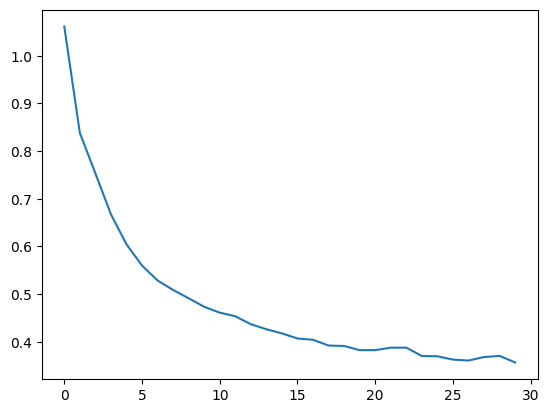

In [14]:
# Mengubah history pembelajaran menjadi dataframe
history_df = pd.DataFrame(history.history)

# Gambarkan grafik trainingnya 
history_df['loss'].plot()

In [15]:
test_loss, test_acc = model.evaluate(valid_X, valid_y)

395/395 [==============================] - 1s 1ms/step - loss: 0.5625 - accuracy: 0.7871


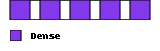

In [26]:
from keras import layers
from collections import defaultdict
import visualkeras
color_map = defaultdict(dict)
color_map[layers.Conv2D]['fill'] = '#00f5d4'
color_map[layers.MaxPooling2D]['fill'] = '#8338ec'
color_map[layers.Dropout]['fill'] = '#03045e'
color_map[layers.Dense]['fill'] = '#8338ec'
color_map[layers.Flatten]['fill'] = '#ffbe0b'
visualkeras.layered_view(model, legend=True, draw_volume=False, color_map=color_map)

In [ ]:
hasil_prediksi = model.predict(train_X)

print(hasil_prediksi)

In [22]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
